In [3]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.fftpack import dct

# Load Video
vid = imageio.get_reader('ZebrafishBrain.mp4',  'ffmpeg')
sizeOfFrame = vid.get_data(0).shape
numFrames = len(vid)
height = sizeOfFrame[0]
width = sizeOfFrame[1]

# First index is frame, then height, width, and RGB
video = np.array([frame for frame in vid ])

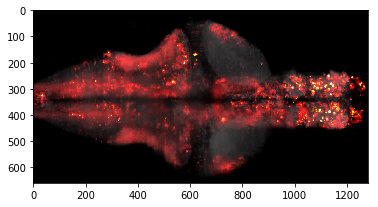

In [4]:
# Delete random stuff in image
video[:,:180,:180,:] = 0
video[:,600:,:100,:] = 0
video[:,500:,1000:,:] = 0

plt.imshow(video[0])
plt.show()

In [5]:
# Do discrete cosine transform
cosTrans = dct(video,axis=0)

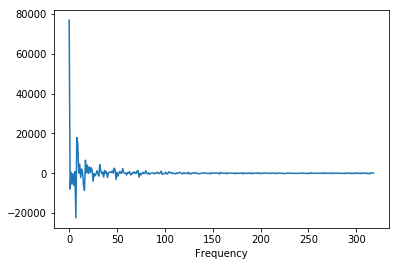

In [7]:
# Spectrum of given pixel
singlePixel = cosTrans[:,300,400,0]
plt.plot(singlePixel)
plt.xlabel('Frequency')
plt.show()

In [8]:
## Compute maximum power for each pixel
principalFrequencies = np.max(cosTrans,axis=0)

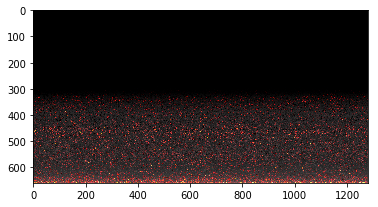

In [10]:
# Sort pixels by principal frequency
red = principalFrequencies[:,:,0]
vals = np.argsort(red,axis=None)

# Convert values to pixel indices
indices = np.array([(num / width, num % width) for num in vals])

im = video[100,indices[:,0],indices[:,1],:].reshape((height,width,3))
plt.imshow(im)
plt.show()

In [26]:
# Write to video
writer = imageio.get_writer('ZebrafishSorted.mp4', fps=6)
for i in range(numFrames):
    writer.append_data(video[i,indices[:,0],
                             indices[:,1],:].reshape((height,width,3)))
writer.close()

In [25]:
video.shape

(319, 660, 1280, 3)

In [30]:
from moviepy.editor import VideoFileClip, clips_array, vfx
clip1 = VideoFileClip("ZebrafishBrain.mp4").margin(10)
clip2 = VideoFileClip("ZebrafishSorted.mp4").margin(10)
finalClip = clips_array([[clip1],[clip2]])
finalClip.write_videofile("my_stack.mp4")

[MoviePy] >>>> Building video my_stack.mp4
[MoviePy] Writing audio in my_stackTEMP_MPY_wvf_snd.mp3


100%|██████████| 1173/1173 [00:00<00:00, 1507.44it/s]

[MoviePy] Done.
[MoviePy] Writing video my_stack.mp4



100%|██████████| 320/320 [00:47<00:00,  8.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: my_stack.mp4 



In [18]:
## Goal 
#Remove black points
#convert each frame to a column and plot columns versus t